In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import array
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn import metrics
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
ATF_without_outlr = pd.read_csv("ATF_wo_outlier_407", encoding='cp1252')
ATF_without_outlr

,Unnamed: 0,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,FBS D/O TEMP,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,ATF STRIPPING STEAM,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,ATF D/O TEMP,ATF Stripper bottom temperature,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature â€“,Result Value
0,0,812.32,131.95,1.66,164.26,38.30,5.82,188.13,123.70,2133.27,143.44,57.89,38.01,220.52,192.96,177.03,23.869034,39.0
1,1,811.88,132.23,1.65,163.36,38.41,5.73,183.09,123.29,2225.82,143.50,57.93,37.98,219.87,191.51,175.65,24.005752,41.5
2,2,807.45,131.99,1.64,163.31,38.34,5.70,179.98,123.19,2207.50,145.54,57.99,38.04,219.35,191.37,175.64,23.793938,38.0
3,3,800.78,134.09,1.63,164.36,38.49,6.03,187.31,124.29,2271.21,146.60,58.54,38.01,222.32,193.59,176.55,25.183988,38.5
4,4,811.73,133.98,1.63,162.91,38.41,5.85,176.66,123.89,2289.31,148.37,56.95,38.00,220.24,190.97,173.85,25.421687,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,434,873.93,110.22,1.50,160.69,33.51,5.58,171.22,122.81,1563.09,124.37,47.12,3.38,220.86,194.62,173.03,22.394674,39.0
403,435,875.07,94.07,1.40,159.79,32.48,5.56,155.03,122.90,1545.17,119.34,43.10,3.39,214.72,191.49,168.74,23.587139,40.0
404,436,875.58,100.27,1.40,158.46,31.56,5.32,155.82,123.04,1535.01,118.06,34.92,3.29,216.80,192.37,170.28,22.891583,39.0
405,437,876.73,97.97,1.40,158.44,31.79,5.55,166.03,123.40,1757.03,115.03,34.02,3.14,217.25,191.90,167.37,25.342483,39.5


In [3]:
ATF_without_outlr.drop(columns = "Unnamed: 0", inplace = True)

In [4]:
ATF_without_outlr.shape

(407, 17)

In [5]:
ATF_without_outlr.skew()

TOTAL CRUDE FLOW                                                             -1.023535
TOTAL ATF KERO/DHDS FLOW                                                     -0.252371
APS Overhead Pressure                                                         1.066894
FBS D/O TEMP                                                                  0.169595
CRUDE API AT 15 DEGC                                                          0.144880
ATF- TOP SECTION PDT                                                         -0.251239
11-T-1 REFLUX FLOW                                                            0.144898
 APS O/H TEMP                                                                -0.565215
ATF STRIPPING STEAM                                                           0.702255
Nphtha Total flow                                                             0.330498
FBS TOTAL FLOW                                                               -0.216052
TPA TO ATF STRIPPER FLOW                   

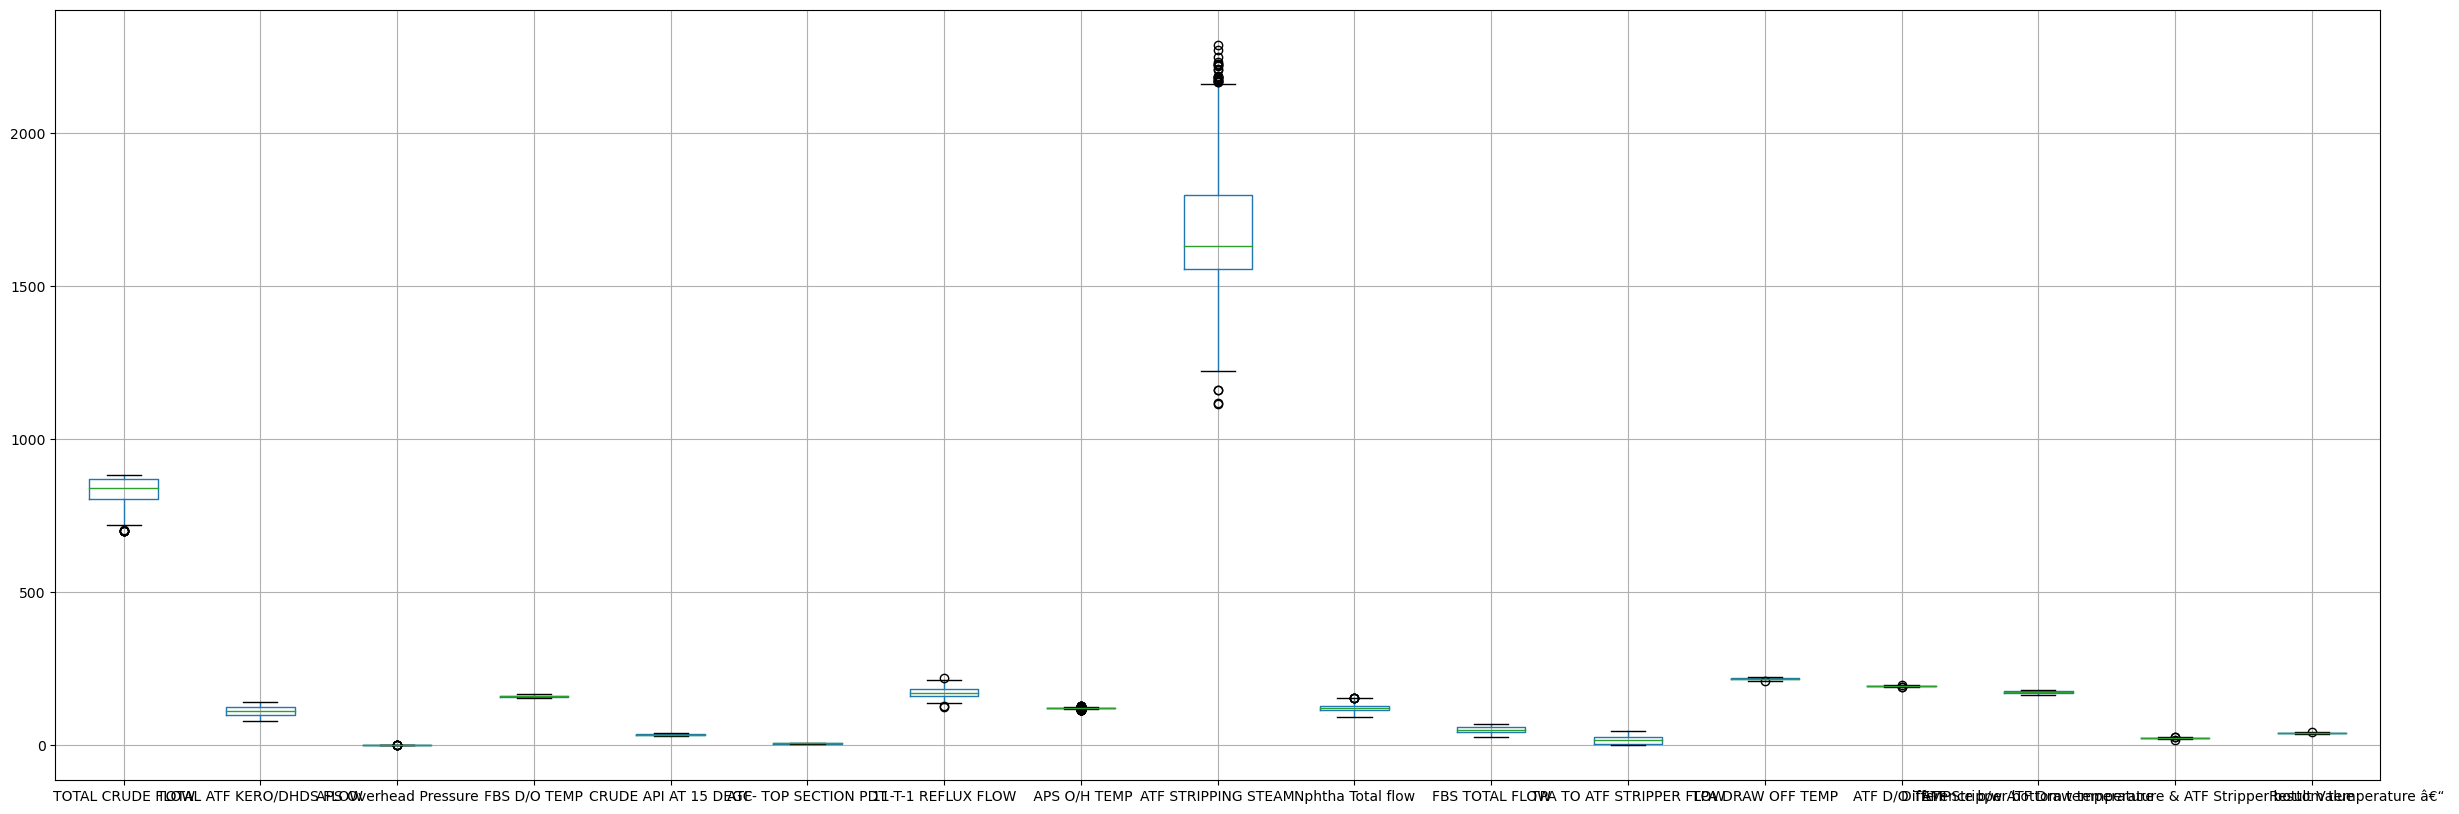

In [6]:
ATF_without_outlr.boxplot(figsize = (30,10))
plt.show()

In [7]:
def get_model_evaluation(model, y_test, y_pred):
    mse=mean_squared_error(y_test,y_pred).round(3)
    mae=mean_absolute_error(y_test,y_pred).round(3)
    rmse=np.sqrt(mse).round(3)
    score=model.score(X_test,y_test).round(3)
    print("Mean Squared Error =", mse)
    print("Mean Absolute Error =", mae)
    print("Root Mean Squared Error =", rmse)
    print("R2_Score Value =", score)

In [88]:
def plot_graph(actual,predicted):
    residual = np.array(actual) - np.array(predicted)  
    fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(15,15))
    sns.lineplot(x = range(len(predicted)), y = predicted,label='y_pred', ax = ax[0,0])
    sns.lineplot(x = range(len(predicted)),y =actual,label='y_test', ax = ax[0,0])
    ax[0,0].set_title('Y_pred and Y_test comparison graph')
    ax[0,0].legend()
    sns.histplot(residual, ax = ax[0,1])
    ax[0,1].set_title('Residual Histogram Plot')
    sns.scatterplot(x=actual,y=residual, ax=ax[1,0])
    ax[1,0].set_title('Actual vs Residual')
    ax[1,0].set_xlabel('Actual')
    ax[1,0].set_ylabel('Residual')
    sns.scatterplot(x=actual,y=predicted, ax=ax[1,1])
    ax[1,1].set_title('Actual vs Predicted')
    ax[1,1].set_xlabel('Actual')
    ax[1,1].set_ylabel('Predicted')
    plt.show()

In [89]:
# df = ATF_without_outlr
# N = int( len(df)*0.9)
# df = df.sample(frac = 1)
# df_test = df.iloc[N:]
# df_train = df.iloc[0:N]
# X_train, y_train = df_train.drop(['Result Value'], axis = 1),  df_train['Result Value']
# X_test, y_test = df_test.drop(['Result Value'], axis = 1), df_test['Result Value']
# mdl = RandomForestRegressor(n_estimators=1000)
# mdl.fit(X_train, y_train)

In [90]:
df = ATF_without_outlr
X = df.drop(columns = "Result Value")
y = df["Result Value"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.10,random_state = 0)

In [91]:
mdl = RandomForestRegressor(n_estimators=1000)
mdl.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [92]:
y_pred = mdl.predict(X_test)

In [93]:
get_model_evaluation(mdl, y_test, y_pred)

Mean Squared Error = 0.888
Mean Absolute Error = 0.765
Root Mean Squared Error = 0.942
R2_Score Value = 0.331


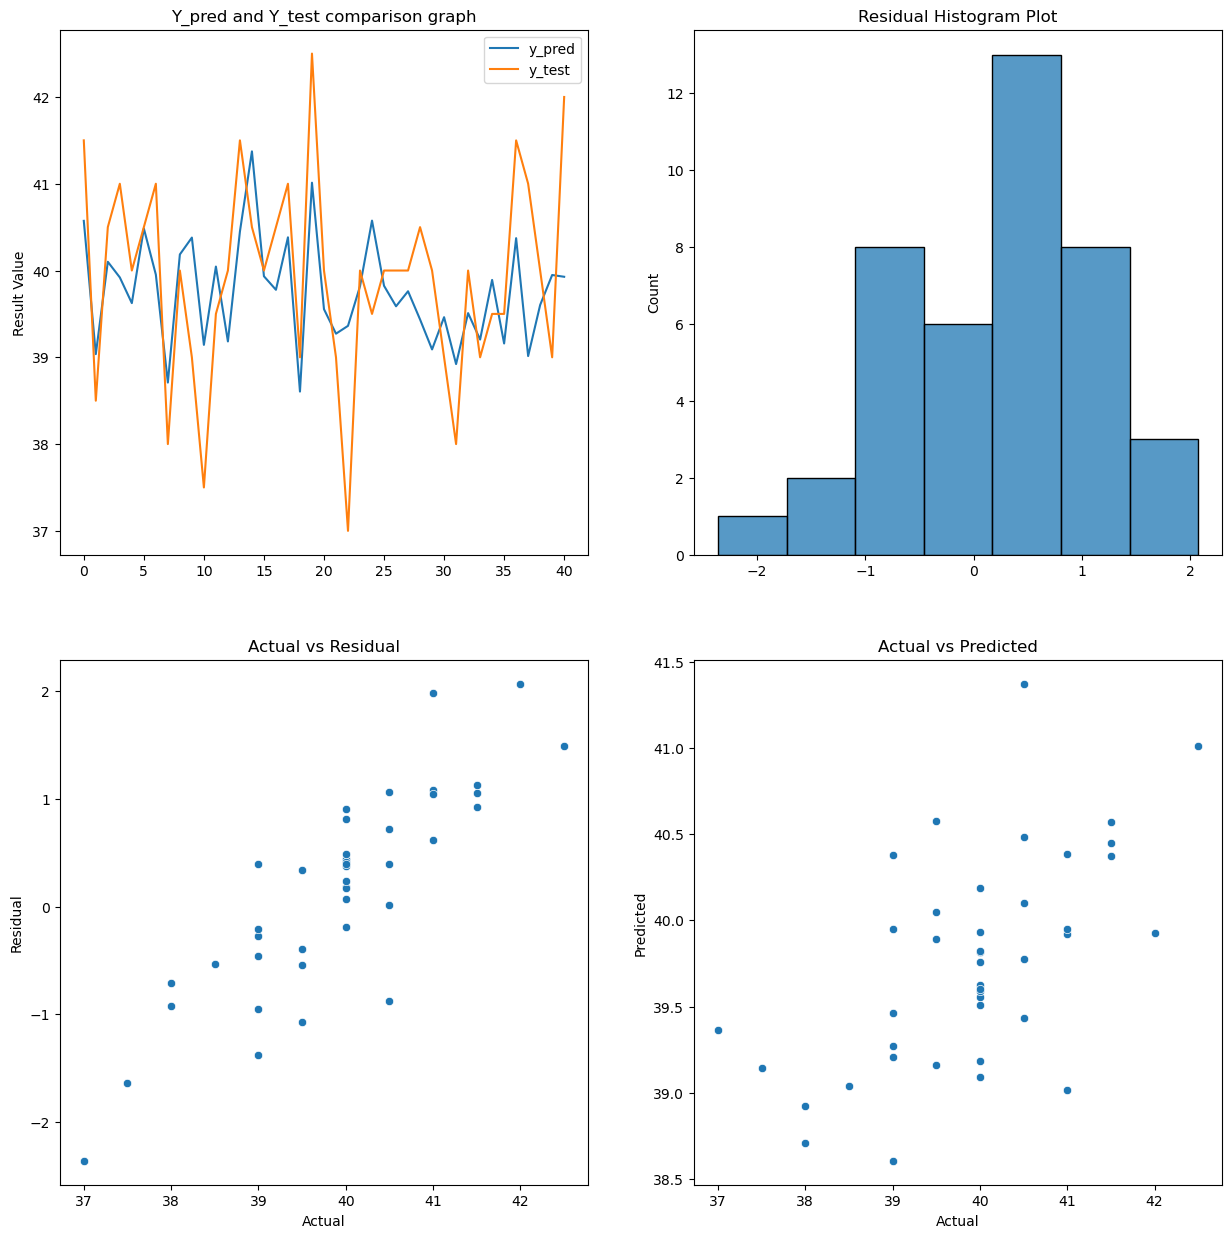

In [94]:
plot_graph(y_test, y_pred)

In [95]:
# def plot__graph(actual,predicted):
#     residual = np.array(actual) - np.array(predicted)  
#     fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(15,15))
#     sns.lineplot(x = range(len(predicted)), y = predicted,label='y_pred', ax = ax[0,0])
#     sns.lineplot(x = range(len(predicted)),y =actual,label='y_test', ax = ax[0,0])
#     ax[0,0].set_title('Y_pred and Y_test comparison graph')
#     ax[0,0].legend()
#     sns.histplot(residual, ax = ax[0,1])
#     ax[0,1].set_title('Residual Histogram Plot')
#     sns.scatterplot(x=predicted,y=residual, ax=ax[1,0])
#     ax[1,0].set_title('Predicted vs Residual')
#     ax[1,0].set_xlabel('Actual')
#     ax[1,0].set_ylabel('Residual')
#     sns.scatterplot(x=actual,y=predicted, ax=ax[1,1])
#     ax[1,1].set_title('Actual vs Predicted')
#     ax[1,1].set_xlabel('Actual')
#     ax[1,1].set_ylabel('Predicted')
#     plt.show()

In [96]:
# plot__graph(y_test, y_pred)

BAGGING REGRESSOR

In [71]:
#creating a bagging regressor with decision tree as base estimator
base_estimator = DecisionTreeRegressor()
bagging_model = BaggingRegressor(base_estimator, n_estimators = 10, random_state = 0)

#fit the model to the training data
bagging_model.fit(X_train, y_train)

#make predictions
y_pred = bagging_model.predict(X_test)

In [72]:
get_model_evaluation(bagging_model, y_test, y_pred)

Mean Squared Error = 0.87
Mean Absolute Error = 0.763
Root Mean Squared Error = 0.933
R2_Score Value = 0.345


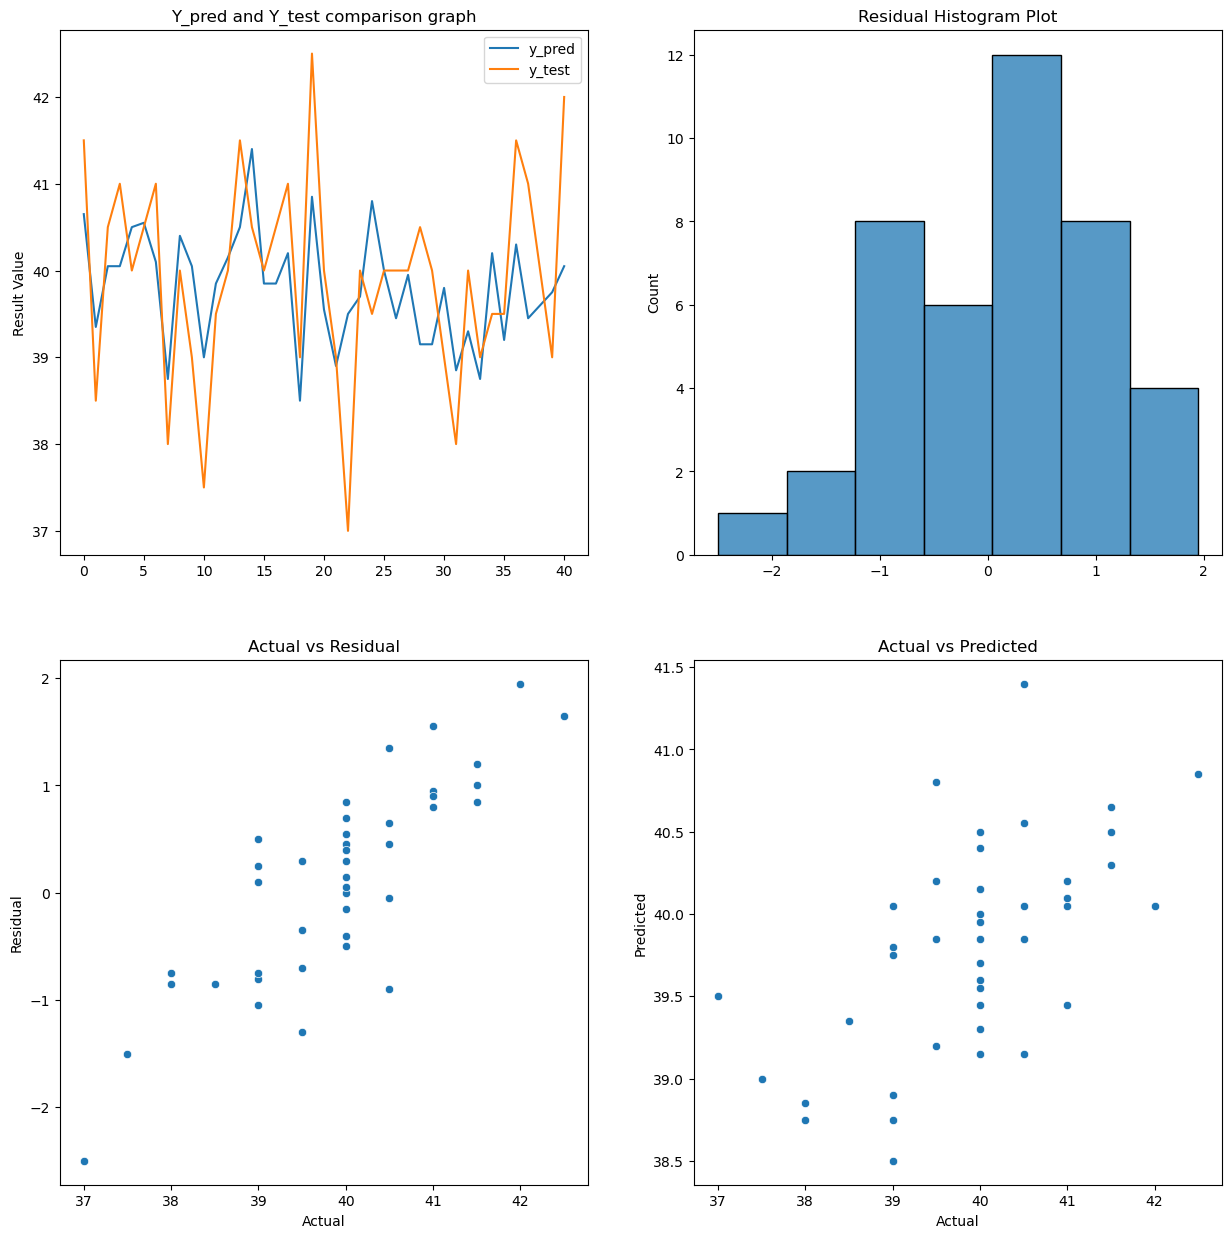

In [73]:
plot_graph(y_test, y_pred)

Using Gradient boosting Regressor

In [63]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
y_pred

array([40.57824687, 39.33856358, 39.63025627, 37.97052513, 40.31754158,
       39.35142463, 39.13382974, 39.23696417, 40.11097839, 38.87629331,
       39.49552755, 39.92809797, 39.33484322, 38.75830473, 39.13470275,
       39.57353168, 38.94556935, 39.13967709, 39.8922375 , 39.31436965,
       39.42498209, 39.97264792, 39.77435854, 38.67138895, 40.40343253,
       37.75472796, 39.82902647, 39.84896609, 39.85228895, 39.56948274,
       40.13705069, 40.35241346, 39.57711889, 39.42411558, 39.43981426,
       40.08399328, 38.94286245, 40.17363644, 39.98935227, 37.76574903,
       39.90816572])

In [17]:
get_model_evaluation(gbr, y_test, y_pred)

Mean Squared Error = 0.796
Mean Absolute Error = 0.694
Root Mean Squared Error = 0.892
R2_Score Value = 0.34


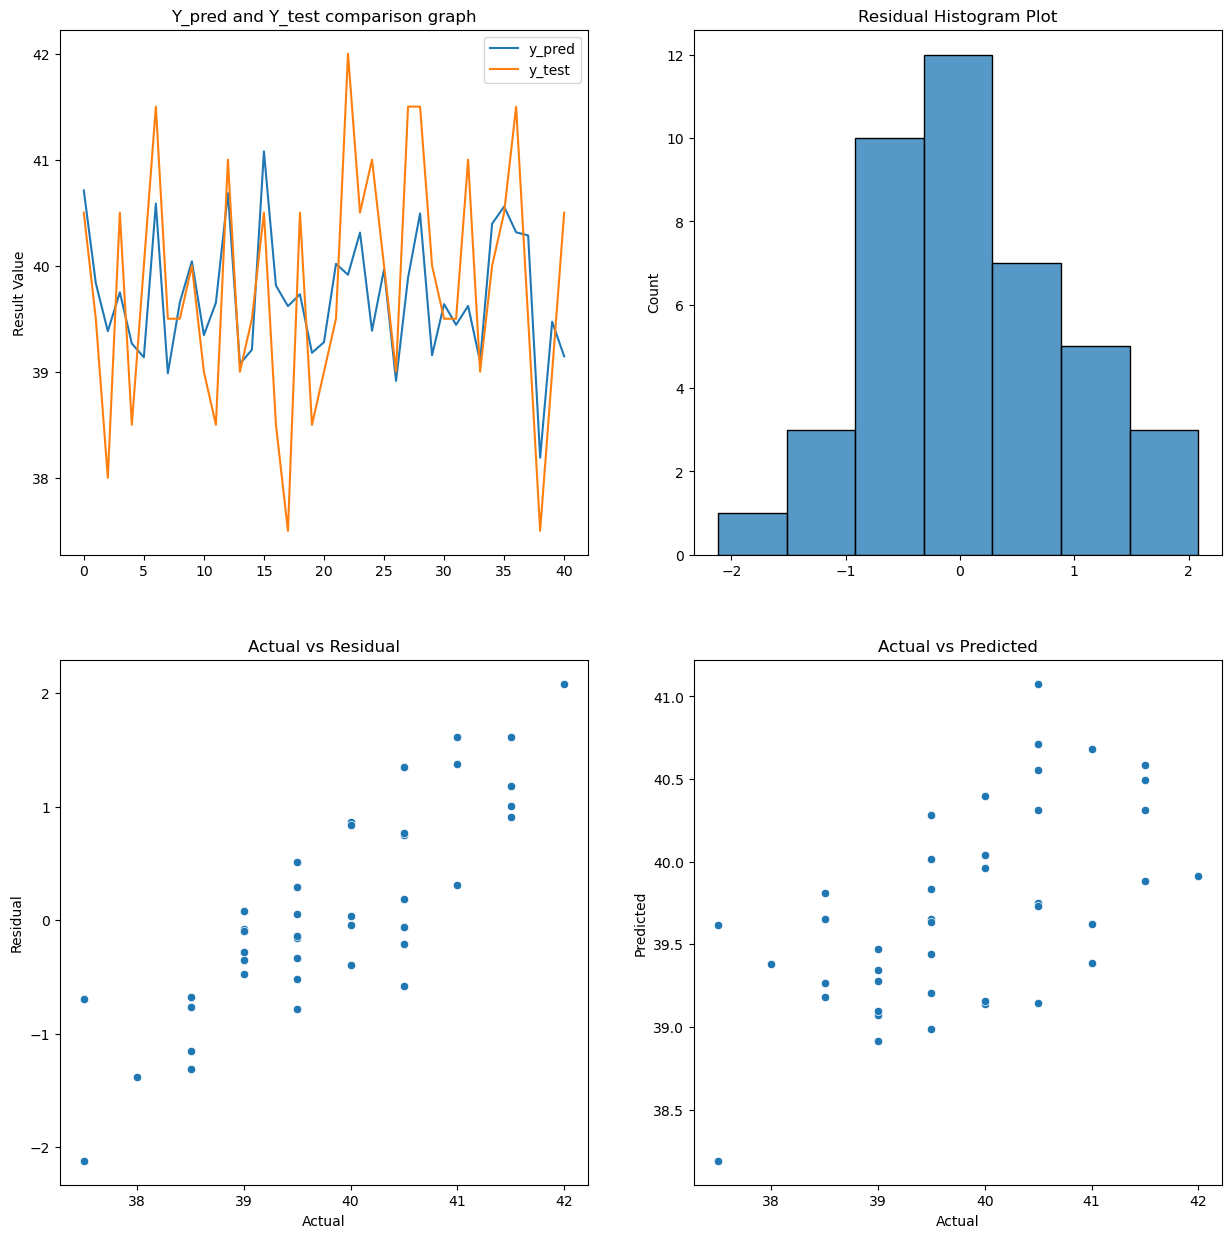

In [18]:
plot_graph(y_test, y_pred)

pipeline

In [19]:
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('model', BaggingRegressor())
    
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', BaggingRegressor())])

In [20]:
y_pred = pipeline.predict(X_test)
y_pred

array([40.55      , 39.65      , 39.4       , 39.6       , 38.95      ,
       38.95      , 41.45      , 38.25      , 39.7       , 39.605     ,
       39.3       , 39.65      , 40.2       , 38.8       , 39.75      ,
       40.75      , 39.55      , 38.95      , 39.72494048, 39.85      ,
       39.6       , 40.4       , 39.7       , 40.4       , 37.85      ,
       39.9       , 38.8       , 40.055     , 40.85      , 39.8       ,
       39.75      , 39.8       , 39.9       , 39.1       , 40.95      ,
       40.6       , 40.6       , 40.5       , 38.2       , 39.25      ,
       39.2       ])

In [21]:
get_model_evaluation(pipeline, y_test, y_pred)

Mean Squared Error = 0.952
Mean Absolute Error = 0.733
Root Mean Squared Error = 0.976
R2_Score Value = 0.211


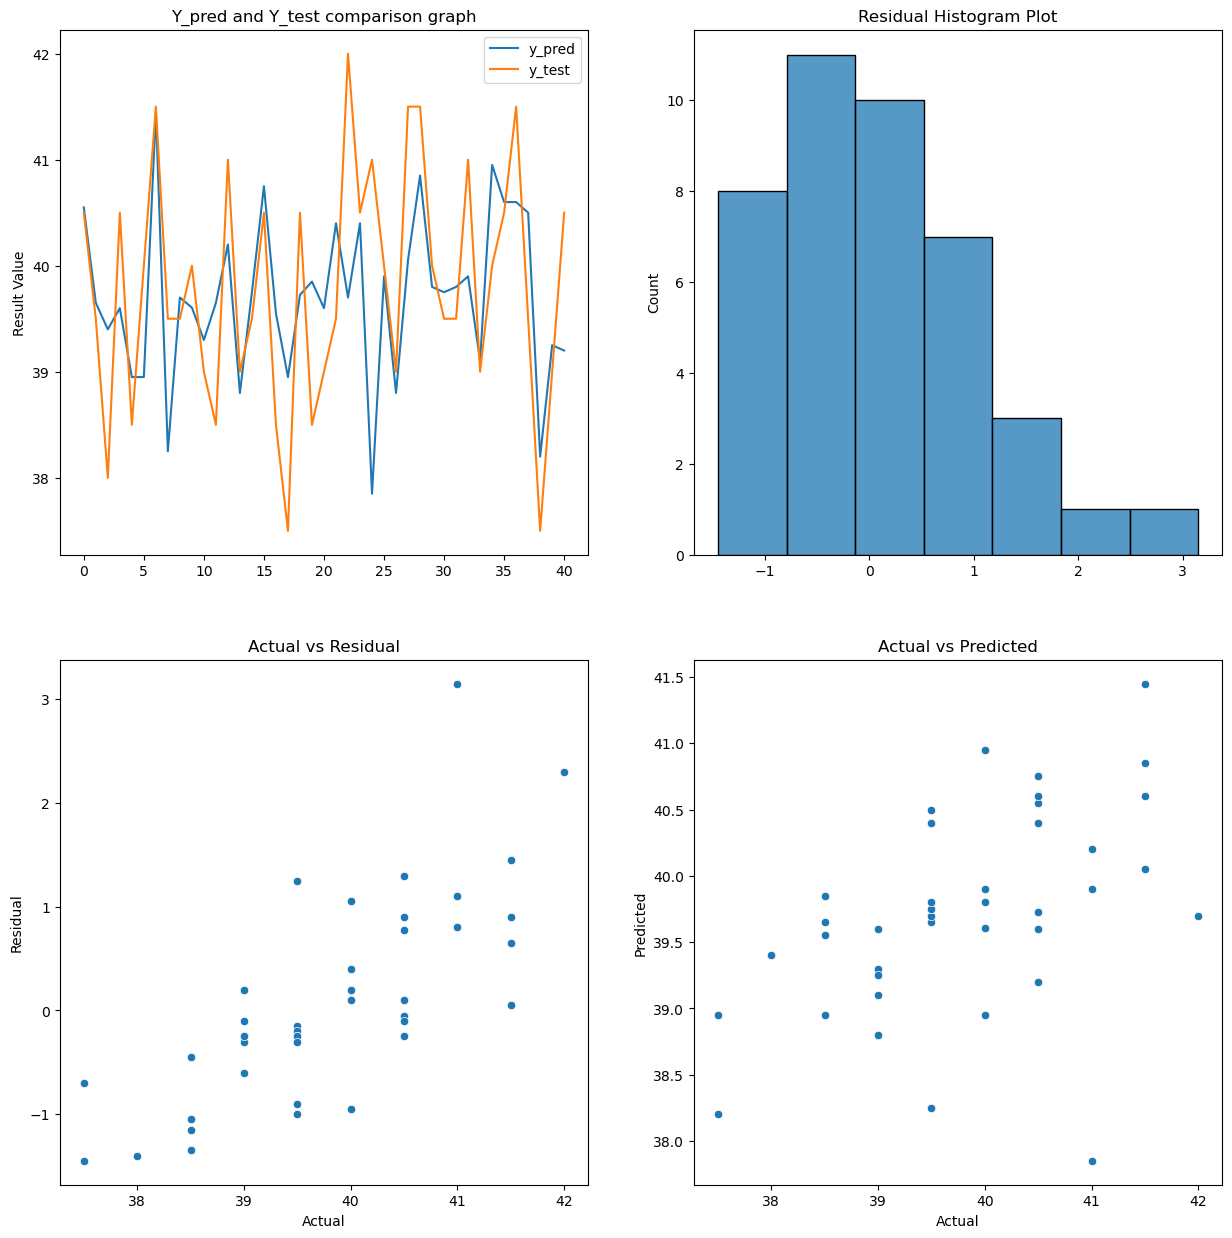

In [22]:
plot_graph(y_test, y_pred)

In [98]:
def get_vif(df):
    d={}
    for i in range(df.shape[1]):
        d[df.columns[i]]=variance_inflation_factor(df.values,i)
    return d 
get_vif(ATF_without_outlr)

{'TOTAL CRUDE FLOW': 1648.1392863371518,
 'TOTAL ATF KERO/DHDS FLOW': 2152.8671447729985,
 'APS Overhead Pressure': 1582.964455244441,
 'FBS D/O TEMP': 121135.01754725758,
 'CRUDE API AT 15 DEGC': 3077.589623971111,
 'ATF- TOP SECTION PDT': 2913.1330049741528,
 '11-T-1 REFLUX FLOW': 1173.595179409659,
 ' APS O/H TEMP': 30862.726875422926,
 'ATF STRIPPING STEAM': 613.005031886079,
 'Nphtha Total flow': 714.2092909441291,
 'FBS TOTAL FLOW': 286.16339812783303,
 'TPA TO ATF STRIPPER FLOW': 1080.6443803494465,
 'TPA DRAW OFF TEMP': 111979.09265375989,
 'ATF D/O TEMP': 1360556.45891614,
 'ATF Stripper bottom temperature': 1611047.7188533621,
 'Difference b/w ATF Draw temperature & ATF Stripper bottom temperature â€“ ': 31565.99799703596,
 'Result Value': 2011.7302495235174}

In [99]:
df3 = ATF_without_outlr.drop(columns = ['ATF Stripper bottom temperature',
                                       'ATF D/O TEMP', 'FBS D/O TEMP'])
get_vif(df3)

{'TOTAL CRUDE FLOW': 1609.9802489713195,
 'TOTAL ATF KERO/DHDS FLOW': 1502.1635826810184,
 'APS Overhead Pressure': 1253.249692575848,
 'CRUDE API AT 15 DEGC': 2964.9413024046135,
 'ATF- TOP SECTION PDT': 2363.2945754564203,
 '11-T-1 REFLUX FLOW': 963.1548156518935,
 ' APS O/H TEMP': 8394.850584701167,
 'ATF STRIPPING STEAM': 471.8744386175276,
 'Nphtha Total flow': 626.7840600292571,
 'FBS TOTAL FLOW': 181.060795825188,
 'TPA TO ATF STRIPPER FLOW': 29.268634159219992,
 'TPA DRAW OFF TEMP': 10725.43122769432,
 'Difference b/w ATF Draw temperature & ATF Stripper bottom temperature â€“ ': 1502.7241284453828,
 'Result Value': 1831.5785821624006}

Variance of feature 1: 1353.38
Variance of feature 2: 253.45
Variance of feature 3: 0.01
Variance of feature 4: 5.71
Variance of feature 5: 0.10
Variance of feature 6: 225.13
Variance of feature 7: 5.38
Variance of feature 8: 52121.67
Variance of feature 9: 142.20
Variance of feature 10: 120.89
Variance of feature 11: 163.21
Variance of feature 12: 7.84
Variance of feature 13: 2.91
Variance of feature 14: 1.32


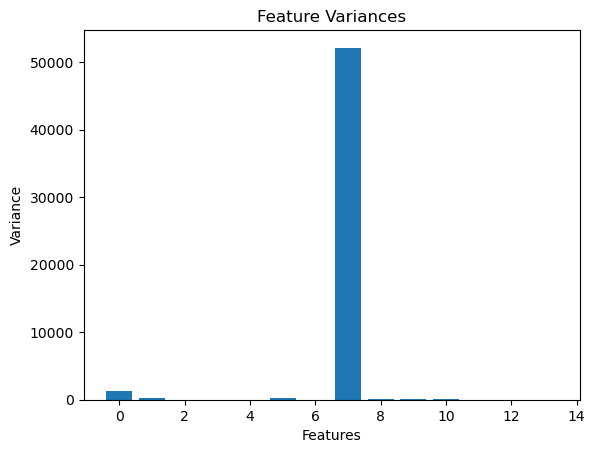

In [101]:
# Calculating variance for each feature
variances = np.var(df3, axis=0)  # Calculate variance along columns (features)
#print(variances)
# visualizing the variances
for i, variance in enumerate(variances):
    print(f"Variance of feature {i+1}: {variance:.2f}")

plt.bar(range(len(variances)), variances)
plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('Feature Variances')
plt.show()

In [102]:
df3.drop(columns = ['ATF STRIPPING STEAM'], inplace = True)

In [103]:
X = df3.drop(columns = "Result Value")
y = df3["Result Value"]

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.10,random_state = 0)

fitting pipeline after removing column with high VIF

In [105]:
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('model', GradientBoostingRegressor())
    
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', GradientBoostingRegressor())])

In [106]:
y_pred = pipeline.predict(X_test)
y_pred

array([40.52639298, 39.21977504, 40.12339105, 40.03734621, 39.6650235 ,
       40.90276511, 40.32544113, 38.41653538, 39.86279443, 40.12305989,
       39.48295791, 39.84747465, 38.77838916, 40.403348  , 40.61588333,
       39.89962696, 39.48345503, 40.14179413, 38.68071773, 40.3828874 ,
       39.53842155, 39.11304682, 39.12377305, 40.13932741, 40.22529606,
       39.05896503, 39.9167196 , 39.5763654 , 39.14154688, 39.08352974,
       39.32085048, 38.91923715, 39.66068055, 39.01836169, 39.71502851,
       39.01093795, 40.37356983, 39.96937577, 39.5405374 , 39.81004623,
       39.96144953])

In [107]:
get_model_evaluation(pipeline, y_test, y_pred)

Mean Squared Error = 0.868
Mean Absolute Error = 0.74
Root Mean Squared Error = 0.932
R2_Score Value = 0.346


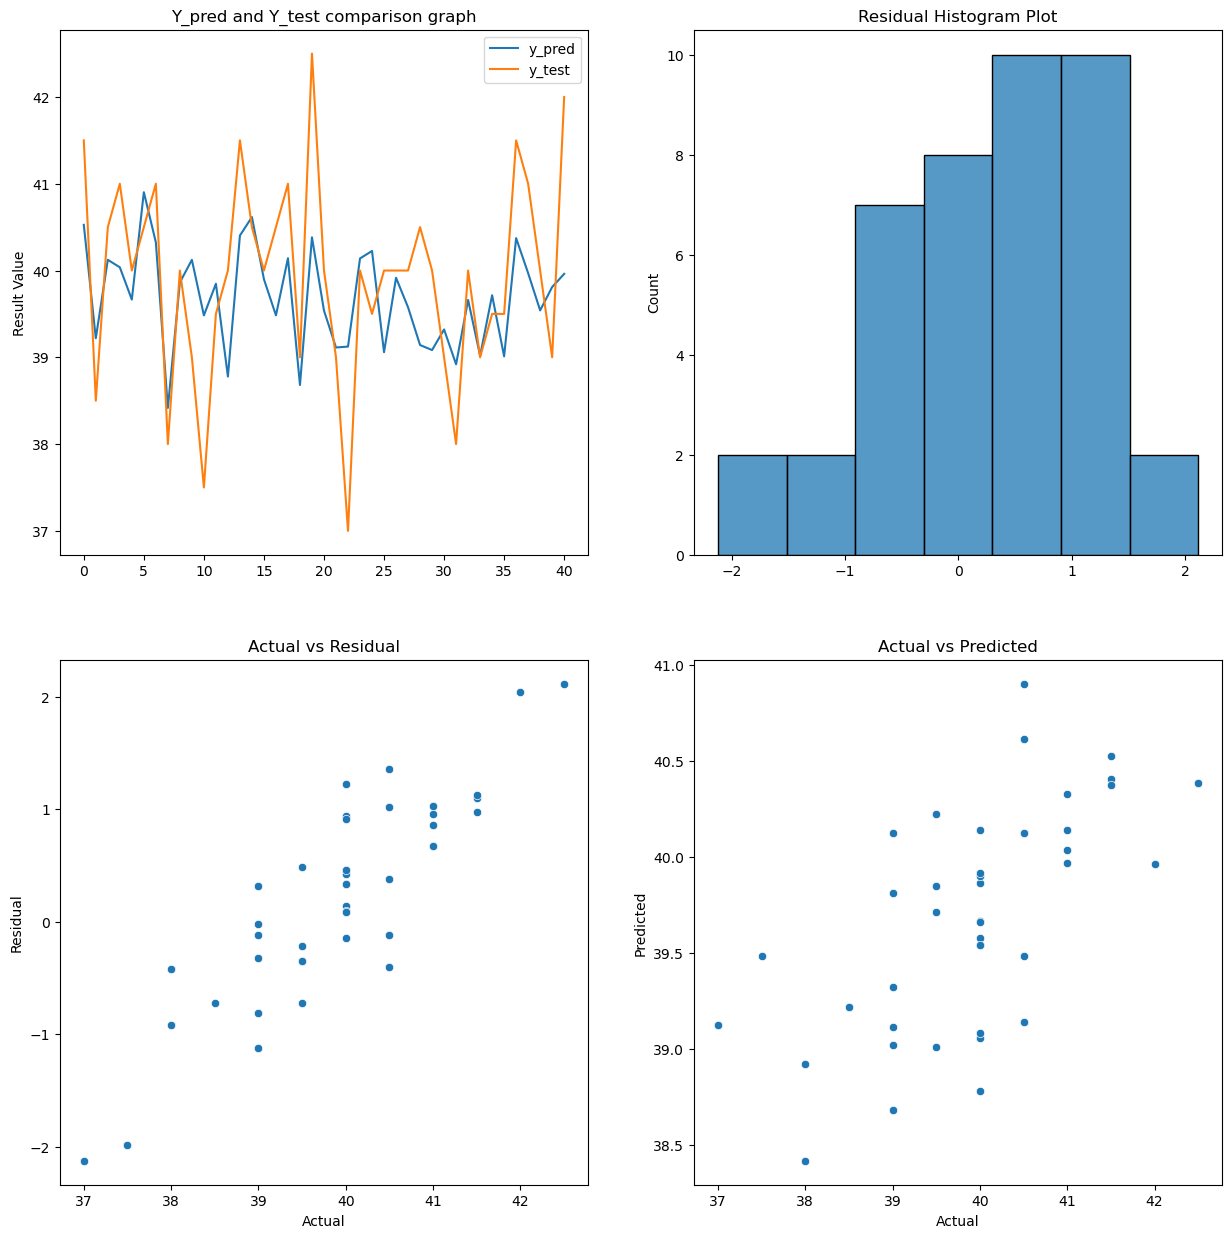

In [108]:
plot_graph(y_test, y_pred)

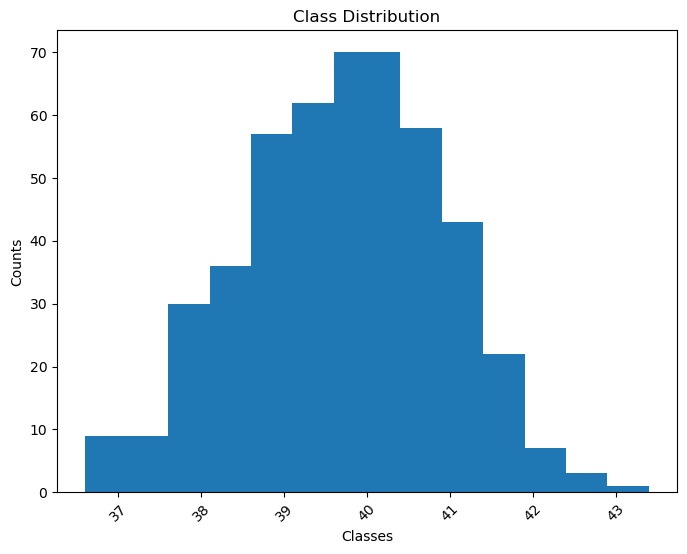

Class Frequencies:
40.0    70
39.5    62
40.5    58
39.0    57
41.0    43
38.5    36
38.0    30
41.5    22
37.0     9
37.5     9
42.0     7
42.5     3
43.0     1
Name: Result Value, dtype: int64

Class Percentages:
40.0    17.199017
39.5    15.233415
40.5    14.250614
39.0    14.004914
41.0    10.565111
38.5     8.845209
38.0     7.371007
41.5     5.405405
37.0     2.211302
37.5     2.211302
42.0     1.719902
42.5     0.737101
43.0     0.245700
Name: Result Value, dtype: float64


In [109]:

# Count the occurrences of each class
class_counts = df3['Result Value'].value_counts()

# Calculate the percentage of each class
class_percentages = class_counts / len(ATF_without_outlr) * 100

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

print("Class Frequencies:")
print(class_counts)

print("\nClass Percentages:")
print(class_percentages)


In [110]:
# for col in df3.columns:
#     sorted_col = sorted(df3[col])
#     q1 = np.percentile(df3[col],25)
#     q2 = np.percentile(df3[col],50)
#     q3 = np.percentile(df3[col], 75)
#     q4 = np.percentile(df3[col],100)
#     quater1 = df3[(df3[col] <= q1)]
#     quater2 = df3[(df3[col] > q1) &(df3[col] <= q2)]
#     quater3 = df3[(df3[col] > q2) &(df3[col] <= q3)]
#     quater4 = df3[(df3[col] > q3) &(df3[col] <= q4)]
# quater1

In [111]:
df5 = df3.copy()
df_train = df5.sample(frac = 0.9, random_state = 0)
df_test = df5.drop(df_train.index)
X_test = df_test.drop(columns = "Result Value")
y_test = df_test["Result Value"]

In [112]:
sorted_Result = sorted(df_train["Result Value"])
q1 = np.percentile(df_train["Result Value"],25)
q2 = np.percentile(df_train["Result Value"],50)
q3 = np.percentile(df_train["Result Value"], 75)
q4 = np.percentile(df_train["Result Value"],100)
quater1 = df_train[(df_train["Result Value"] <= q1)]
quater2 = df_train[(df_train["Result Value"] > q1) &(df_train["Result Value"] <= q2)]
quater3 = df_train[(df_train["Result Value"] > q2) &(df_train["Result Value"] <= q3)]
quater4 = df_train[(df_train["Result Value"] > q3) &(df_train["Result Value"] <= q4)]
Quaters = [quater1.shape, quater2.shape, quater3.shape, quater4.shape]
print(Quaters)
max(Quaters)[0]
# quater1.shape[0]
        

[(130, 13), (56, 13), (110, 13), (70, 13)]


130

In [113]:
quater2["Result Value"].value_counts()

39.5    56
Name: Result Value, dtype: int64

In [114]:
#(select rANDOM ROW FROM each quater so that their rows become equal to max(Quaters))
#selecting random row
def get_balanced_quaters(quater):
    while quater.shape[0] != 2*(max(Quaters)[0]):
        random_row = quater.sample(n = 1, random_state = random.seed())
        #print(random_row)
        quater = pd.concat([quater, random_row], ignore_index = True)
    return quater


In [115]:
# #(select rANDOM ROW FROM each quater so that their rows become equal to max(Quaters))
# #selecting random row
# def get_balanced_df(df):
#     sorted_Result = sorted(df3["Result Value"])
#     q1 = np.percentile(df3["Result Value"],25)
#     q2 = np.percentile(df3["Result Value"],50)
#     q3 = np.percentile(df3["Result Value"], 75)
#     q4 = np.percentile(df3["Result Value"],100)
#     quater1 = df3[(df3["Result Value"] <= q1)]
#     quater2 = df3[(df3["Result Value"] > q1) &(df3["Result Value"] <= q2)]
#     quater3 = df3[(df3["Result Value"] > q2) &(df3["Result Value"] <= q3)]
#     quater4 = df3[(df3["Result Value"] > q3) &(df3["Result Value"] <= q4)]
#     Quaters = [quater1.shape, quater2.shape, quater3.shape, quater4.shape]
#     #print(Quaters)
#     #max(Quaters)[0]
#     # quater1.shape[0]
    
#     while df.shape[0] != max(Quaters)[0]:
#         random_row = df.sample(n = 1, random_state = random.seed())
#         #print(random_row)
#         df = pd.concat([df, random_row], ignore_index = True)
#     return df

In [116]:
bal_q1 = get_balanced_quaters(quater1)
bal_q1

,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature â€“,Result Value
0,877.43,101.95,1.40,30.28,5.44,181.73,121.38,121.73,34.96,2.65,216.20,22.522795,38.5
1,799.67,134.99,1.78,38.27,5.89,203.83,120.78,134.18,60.08,27.01,221.10,23.082334,38.0
2,875.85,119.46,1.40,31.87,5.28,165.06,123.13,124.73,49.05,23.00,217.66,20.021657,39.0
3,877.17,107.99,1.65,34.98,5.76,185.36,122.86,125.05,55.96,3.03,217.12,24.998424,37.5
4,831.12,134.49,1.75,38.00,5.75,186.24,121.47,128.96,68.14,37.99,220.15,23.640503,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,827.25,139.61,1.79,37.55,5.81,213.17,116.57,128.67,68.04,31.99,221.02,20.968403,38.5
256,814.85,85.03,1.46,30.29,5.63,210.89,119.79,105.10,29.55,1.37,213.85,24.409328,39.0
257,810.72,80.97,1.40,29.66,4.95,161.11,120.95,98.14,26.02,2.36,212.16,23.016430,37.0
258,833.42,84.62,1.40,29.72,5.13,168.40,120.91,111.30,34.94,2.58,214.56,23.450702,38.5


In [117]:
bal_q2 = get_balanced_quaters(quater2)
bal_q2

,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature â€“,Result Value
0,799.49,88.33,1.40,29.68,5.06,163.03,120.82,110.30,34.01,1.99,212.28,24.770445,39.5
1,875.40,99.26,1.45,33.93,5.60,171.36,123.03,133.16,55.89,2.72,215.18,25.988199,39.5
2,820.18,88.03,1.40,29.98,5.03,163.74,121.02,112.20,32.99,1.73,216.49,24.123358,39.5
3,850.86,138.48,1.75,36.99,5.73,183.91,120.88,151.44,66.31,36.99,220.28,24.939913,39.5
4,849.42,134.22,1.75,37.00,5.70,190.29,120.90,152.03,64.55,37.01,218.08,25.596692,39.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,875.42,125.95,1.50,35.50,5.65,172.27,122.94,132.92,60.02,36.00,217.27,22.514252,39.5
256,819.51,122.87,1.55,34.94,5.44,183.48,119.82,127.42,48.01,30.04,217.35,21.942831,39.5
257,876.27,106.13,1.39,30.66,5.72,192.11,121.46,128.17,36.97,2.27,217.52,22.978680,39.5
258,820.18,88.03,1.40,29.98,5.03,163.74,121.02,112.20,32.99,1.73,216.49,24.123358,39.5


In [118]:
bal_q3 = get_balanced_quaters(quater3)
bal_q3

,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature â€“,Result Value
0,856.93,130.72,1.44,34.08,5.72,182.76,121.74,133.70,47.55,34.94,218.36,22.136239,40.5
1,831.91,95.17,1.40,29.66,4.90,148.62,120.68,115.57,34.96,2.32,214.14,22.686547,40.0
2,699.71,84.09,1.45,31.53,4.94,157.63,115.97,93.90,51.17,10.00,213.52,23.205216,40.5
3,790.48,97.47,1.35,30.62,5.11,157.13,122.17,109.39,40.04,5.00,215.56,23.073200,40.0
4,875.34,132.24,1.75,38.92,5.52,166.08,125.81,147.79,69.88,45.07,216.57,23.948180,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,828.97,91.33,1.40,30.69,4.99,156.69,121.82,114.33,44.98,5.01,213.78,22.953199,40.0
256,839.46,125.10,1.45,33.82,5.48,182.31,116.82,122.12,59.91,28.02,219.49,21.057482,40.0
257,699.71,84.09,1.45,31.53,4.94,157.63,115.97,93.90,51.17,10.00,213.52,23.205216,40.5
258,839.46,111.53,1.40,32.49,5.26,170.59,121.85,112.33,51.12,18.00,217.18,21.199662,40.0


In [119]:
bal_q4 = get_balanced_quaters(quater4)
bal_q4

,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature â€“,Result Value
0,849.70,128.15,1.48,34.71,5.90,200.65,119.33,126.83,58.87,24.99,221.44,22.055551,41.5
1,789.66,85.15,1.40,30.47,4.91,151.79,121.60,103.99,37.11,2.84,211.37,24.322740,41.0
2,789.71,93.45,1.35,30.78,5.46,175.41,122.25,109.51,40.02,5.00,217.76,24.363242,41.0
3,876.67,99.92,1.45,32.96,5.74,174.59,123.27,132.58,56.04,2.88,215.25,26.273443,41.5
4,850.62,128.03,1.45,34.19,5.69,193.03,118.98,122.11,59.01,25.03,221.07,20.612353,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,829.25,94.08,1.40,30.60,4.98,152.99,121.94,113.89,45.04,5.01,213.86,22.883747,41.0
256,803.09,103.33,1.40,32.84,5.23,172.70,116.93,107.55,51.94,10.01,218.24,20.568791,41.0
257,801.64,102.18,1.40,32.74,5.18,167.44,117.13,106.74,53.97,10.00,218.26,21.909311,42.0
258,803.09,103.33,1.40,32.84,5.23,172.70,116.93,107.55,51.94,10.01,218.24,20.568791,41.0


In [120]:
print(bal_q1["Result Value"].value_counts(), bal_q2["Result Value"].value_counts(),
      bal_q3["Result Value"].value_counts(), bal_q4["Result Value"].value_counts())

39.0    103
38.5     79
38.0     44
37.0     18
37.5     16
Name: Result Value, dtype: int64 39.5    260
Name: Result Value, dtype: int64 40.0    133
40.5    127
Name: Result Value, dtype: int64 41.0    157
41.5     51
42.0     32
42.5     20
Name: Result Value, dtype: int64


In [121]:
quater2["Result Value"].value_counts()

39.5    56
Name: Result Value, dtype: int64

In [122]:
df4 = pd.concat([bal_q1,bal_q2,bal_q3,bal_q4],ignore_index = True)
df4

,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature â€“,Result Value
0,877.43,101.95,1.40,30.28,5.44,181.73,121.38,121.73,34.96,2.65,216.20,22.522795,38.5
1,799.67,134.99,1.78,38.27,5.89,203.83,120.78,134.18,60.08,27.01,221.10,23.082334,38.0
2,875.85,119.46,1.40,31.87,5.28,165.06,123.13,124.73,49.05,23.00,217.66,20.021657,39.0
3,877.17,107.99,1.65,34.98,5.76,185.36,122.86,125.05,55.96,3.03,217.12,24.998424,37.5
4,831.12,134.49,1.75,38.00,5.75,186.24,121.47,128.96,68.14,37.99,220.15,23.640503,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,829.25,94.08,1.40,30.60,4.98,152.99,121.94,113.89,45.04,5.01,213.86,22.883747,41.0
1036,803.09,103.33,1.40,32.84,5.23,172.70,116.93,107.55,51.94,10.01,218.24,20.568791,41.0
1037,801.64,102.18,1.40,32.74,5.18,167.44,117.13,106.74,53.97,10.00,218.26,21.909311,42.0
1038,803.09,103.33,1.40,32.84,5.23,172.70,116.93,107.55,51.94,10.01,218.24,20.568791,41.0


In [123]:
df4.reset_index(drop = True)

,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature â€“,Result Value
0,877.43,101.95,1.40,30.28,5.44,181.73,121.38,121.73,34.96,2.65,216.20,22.522795,38.5
1,799.67,134.99,1.78,38.27,5.89,203.83,120.78,134.18,60.08,27.01,221.10,23.082334,38.0
2,875.85,119.46,1.40,31.87,5.28,165.06,123.13,124.73,49.05,23.00,217.66,20.021657,39.0
3,877.17,107.99,1.65,34.98,5.76,185.36,122.86,125.05,55.96,3.03,217.12,24.998424,37.5
4,831.12,134.49,1.75,38.00,5.75,186.24,121.47,128.96,68.14,37.99,220.15,23.640503,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,829.25,94.08,1.40,30.60,4.98,152.99,121.94,113.89,45.04,5.01,213.86,22.883747,41.0
1036,803.09,103.33,1.40,32.84,5.23,172.70,116.93,107.55,51.94,10.01,218.24,20.568791,41.0
1037,801.64,102.18,1.40,32.74,5.18,167.44,117.13,106.74,53.97,10.00,218.26,21.909311,42.0
1038,803.09,103.33,1.40,32.84,5.23,172.70,116.93,107.55,51.94,10.01,218.24,20.568791,41.0


In [124]:
df4[df4.index.duplicated()]

,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature â€“,Result Value


In [125]:
# X = df4.drop(columns = "Result Value")
# y = df4["Result Value"]

In [126]:
X_train, y_train = df_train.drop(['Result Value'], axis = 1),  df_train['Result Value']

In [127]:
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('model', GradientBoostingRegressor(n_estimators=10000))
    
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', GradientBoostingRegressor(n_estimators=10000))])

In [128]:
y_pred = pipeline.predict(X_test)
y_pred

array([41.27704522, 40.85266972, 39.5153368 , 39.98703256, 40.7988069 ,
       38.11311943, 39.33889431, 39.29415217, 40.75600348, 41.10001437,
       41.01840287, 39.93909842, 39.34652016, 40.47883367, 40.27022206,
       40.03748802, 39.80421828, 40.19286134, 39.22817263, 40.19155311,
       39.        , 40.82828934, 40.65477744, 38.87750898, 40.59031883,
       39.95741576, 39.28084173, 40.02776589, 39.86769636, 37.58032627,
       39.97238645, 40.04178599, 39.6875    , 39.41580398, 38.58659712,
       39.0959308 , 39.96047478, 39.35160406, 41.11757191, 38.92529366,
       39.59936439])

In [129]:
get_model_evaluation(pipeline, y_test, y_pred)

Mean Squared Error = 1.235
Mean Absolute Error = 0.762
Root Mean Squared Error = 1.111
R2_Score Value = 0.037


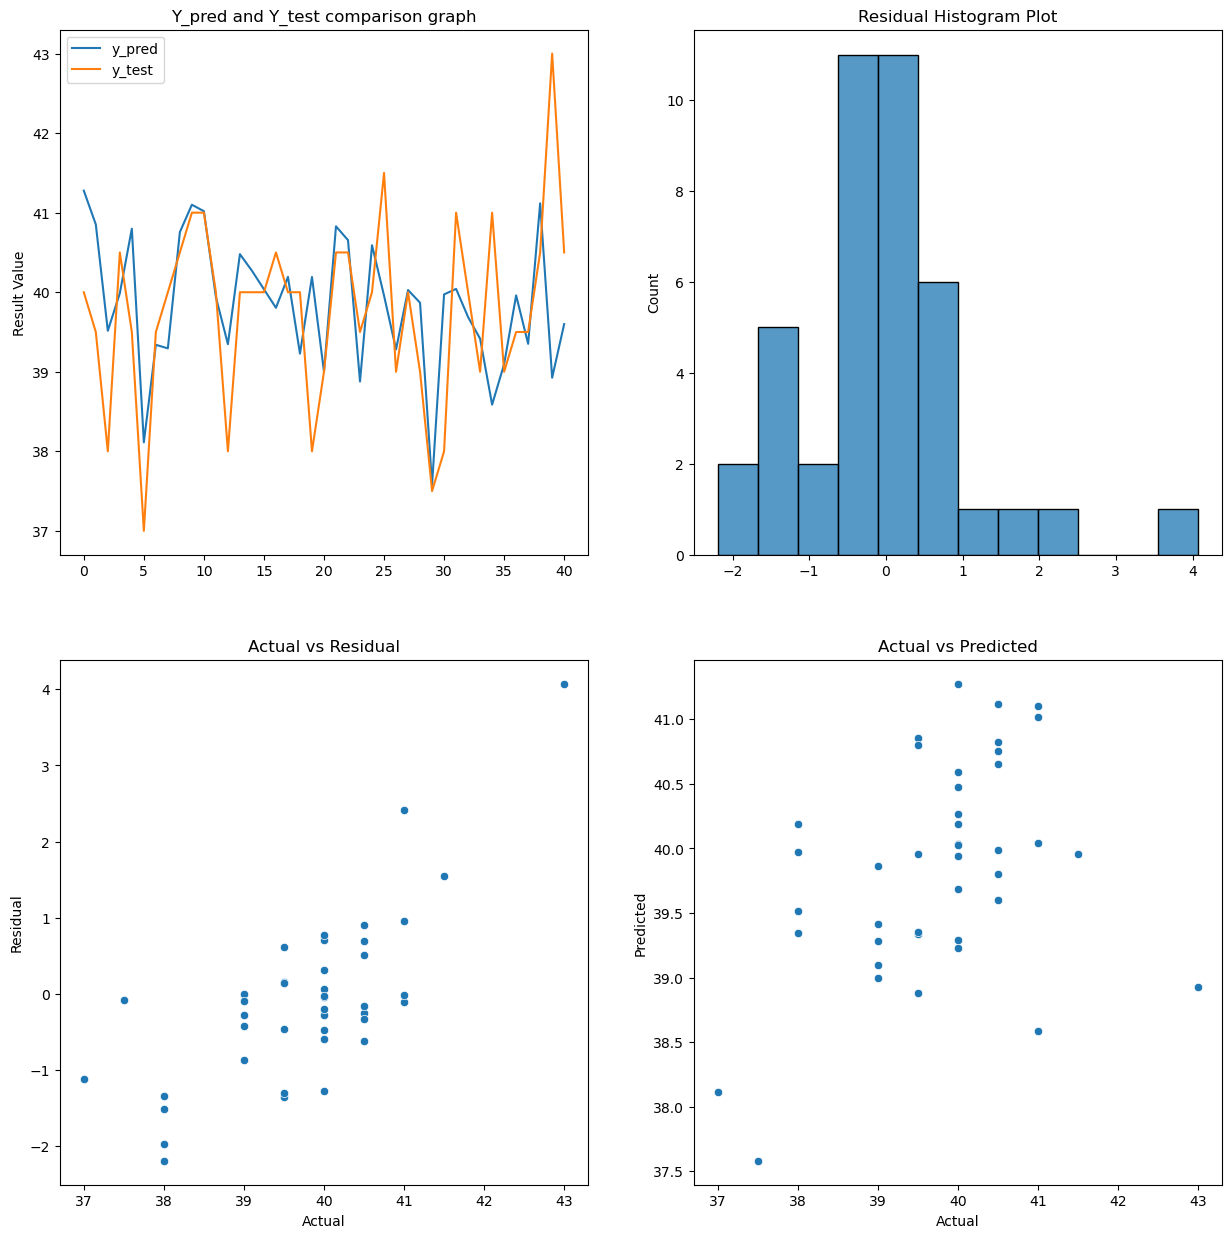

In [130]:
plot_graph(y_test,y_pred)

In [131]:
#test set alag rakho Fir bs train set pe quaters devide karne hai